# 4. házi feladat (HF4)

Beadási határidő: 11.08. 23:59

Beküldés: a Microsoft Teams felületén keresztül

Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd
import random
from sympy import *
init_printing(use_unicode=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## 1. feladat (HF4/1) (5 pont)

Ebben a feladatban a logisztikus regresszió algoritmusát kell megvalósítanod spam-szűrés céljából. A UCI adattárház [*Spambase* adatain](https://archive.ics.uci.edu/ml/datasets/Spambase) fogunk vizsgálódni. Az adatokat a saját gépedre való letöltés nélkül igyekezz betölteni!

**a)** (4 pont)<br>
Programozz le egy egyszerű logisztikus regressziós osztályozó algoritmust (tehát ne beépített algoritmust használj)! <br>
A feladatot a második háziban megírt MykNN osztályhoz hasonlóan, objektum orientált módon kell megoldani. 
- Hozz létre egy MyLogisticRegression osztályt.
- A konstruktor tárolja el a paramétereket neki megfelelő adattagokban. Adj meg nekik valamilyen kezdeti értékeket.
- A .fit(self, X_train, y_train) metódus számolja ki a logisztikus regresszió paramétereit.
- A .predict(self, X_test) pedig adja vissza a predikciókat. (0 vagy 1)
- A .predict_proba(self, X_test) pedig adja vissza a predikciós scoreokat. (0 és 1 közötti valós szám)

>Tipp: a Notebook04-ben számos hasznos segítséget találsz a lineáris regresszió implementálásánál.

**b)** (1 pont)<br>
Használd ugyanennek a problémának a megoldására az *sklearn* könyvtár megfelelő függvényét is. Hogy viszonyul egymáshoz az általad implementált és a könyvtárban lévő megoldás pontosság (accuracy) és futásidő tekintetében? Adj írásos választ is!<br> (Ne aggódj, ha a te megoldásod rosszabb lesz, nem cél az *sklearn* könyvtárban implementáltnál jobbat írni.)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets


In [ ]:
X.head()

In [ ]:
X.insert(0, "constant", [1 for i in range(4601)])

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad(w, X_train, y_train):
    out = np.array([0 for i in range(58)])
    for j in range(58):
        for i in range(4601):
            out[j] += y_train.iloc[i].iloc[0] * sigmoid(-np.dot(w, X_train.iloc[i])) * (-1) * X_train.iloc[i].iloc[j] + (1 - y_train.iloc[i].iloc[0]) * sigmoid(np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j]
    return out

def sztochgrad(w, X_train, y_train):
    out = np.array([0 for i in range(58)])
    i = random.randint(0,shape(X_train)[0]-1 )
    for j in range(58):
        out[j] = -1 * y_train.iloc[i].iloc[0]  * sigmoid(-np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j] ### y_i = 1 esetén, azaz ha 1 a célváltozó értéke
        + (1 - y_train.iloc[i].iloc[0]) * sigmoid( np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j] ### y_i = 0 esetén, azaz ha 0 a célváltozó értéke
    return out




class MyLogisticRegression():
    def __init__(self, w = [random.random() for _ in range(58)]):
        self.w = w
        return None
    
    def fit(self, X_train, y_train, lrate):
        #X_train.insert(0, "constant", [1 for i in range(4601)])
        for _ in range(1000):
            self.w = self.w - lrate * sztochgrad(self.w, X_train, y_train)
            lrate = lrate * 0.1
    
    def predict(self, X_test):
        return np.array([ 0 if self.predict_proba(X_test)[i] < 0.5 else 1 for i in range(shape(X_test)[0])])
    
    def predict_proba(self, X_test):
        return np.array([sigmoid(np.dot(self.w, X_test.iloc[i])) for i in range(shape(X_test)[0])])



---

In [ ]:
#i = random.randint(0, 4600)
#i=4600
#print(i)
#print(sigmoid(np.dot(valami.w, X.iloc[i])))
#print(np.dot(valami.w, X.iloc[i]))
"""lista = []
lista2 = []
for i in range(4601):
    lista.append(np.dot(valami.w, X.iloc[i]))
    lista2.append(valami.predict(X.iloc[i]))
lista.sort()
print(lista)"""

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

valami = MyLogisticRegression()
valami.fit(X_train, y_train, 0.5)

pred = valami.predict(X_test)

print(pred)

In [ ]:
skmodel = sklearn.linear_model.LogisticRegression()
skmodel.fit(X_train, y_train)
skpred = skmodel.predict(X_test)

In [ ]:
print(f'Accuracy of MyLogisticRegression: {round(sklearn.metrics.accuracy_score(y_test, pred),2)}')
print(f'Accuracy of ScikitLearn: {round(sklearn.metrics.accuracy_score(y_test, skpred),2)}')


Válasz: Jelenleg sajnos nem látszik, de lefut a programom, csak most távolról nem tudja betölteni az adatokat (szerverhiba miatt) :(

## 2. feladat (HF4/2) (6 pont)

Ebben a feladatban polinomiális regresszióval fogunk foglalkozni és a polinom fokának az eredményre gyakorolt hatását vizsgáljuk.

**a)** (1 pont)<br>
Konstruálj adatot ismert háttéreloszlásból, azaz hozz létre mesterséges kétdimenziós adatot! Szimulálj legalább 1000 adatpontot!
* Használd a lent megadott adatgeneráló függvényt a [-4,5] intervallumon! (Módosíthatod a függvényt úgy, hogy neked jobban tetsző adatokat hozzon létre, a lényeg, hogy a generált adat egy "zajos polinom" legyen egy értelmes intervallumon!)
* Az adatok (véletlenszerűen választott) 70%-át tekintsd tanítóadatnak, a többit tesztadatnak!
> Tipp: használd a  *train_test_split* függvényt!
* Ábrázold az adatot pontfelhőként! Ábrázold külön színnel a tanító- és tesztadatokat.

In [2]:
import numpy as np

def curve_generator( x , sigma ):
    y = np.random.normal( x ** 4  -  x ** 3 - 20 * x ** 2 + 27 * x + 2 , sigma )
    return y

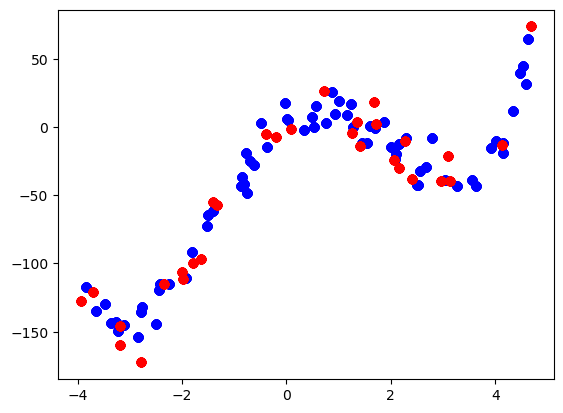

In [3]:
list = pd.Series([random.random()*9 -4 for i in range(100)])

train_x, test_x = train_test_split(list, test_size=0.3, random_state=5)
train_y = [curve_generator(i, 10) for i in train_x]
test_y = [curve_generator(i, 10) for i in test_x]
list_y = [train_y[i] for i in range(len(train_x))] + [test_y[i] for i in range(len(test_y))]

for i in range(len(train_x)):
    plt.scatter(train_x, train_y, c="blue", label="Training points")
for i in range(len(test_x)):
    plt.scatter(test_x, test_y, c="red", label="Tested points")

plt.show()

**b)** (3 pont)<br>
Tanítsunk egyszerű polinomiális regressziót az adatra (célváltozó: $y$, magyarázó változó: $x$).
> Tipp: használd az *np.polyfit* függvényt!

* Ábrázold egy ábrán (külön színnel) a tanítóhalmazbeli és a teszthalmazbeli hibát (RMSE-értéket) a regressziós polinom fokának függvényében (változtasd a polinom fokát 0 és 20 között)!
* Készíts ábrákat 3x7-es rácsban, amelyeken látszik hogy az egyes polinomok hogyan simulnak az adatra! Az egyes részábrák címe mutassa melyik fokú polinomról van szó, az ábrák tengelyeit pedig rejtsd el!
> Tipp: használd a *plt.subplots* függvényt!

* Mit tapasztalsz?

In [4]:
def atlag(lista):
    s = 0
    for i in lista:
        s += i
    return s/len(lista)



def rmse(set_x, set_y, d):
    coeff = np.polyfit(train_x, train_y, deg=d)
    pred = np.poly1d(coeff)
    return atlag((pred(set_x)-set_y)**2)**0.5


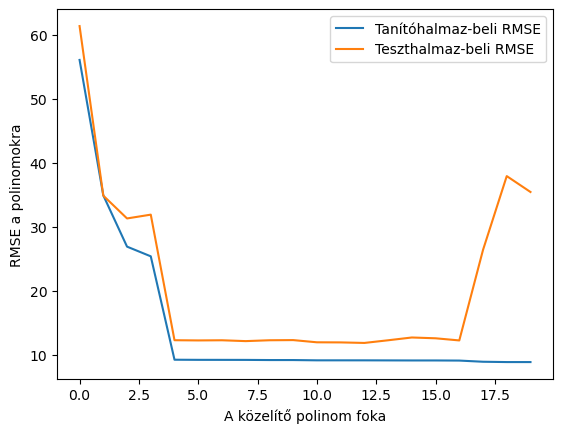

In [5]:
lista1 = []
lista2 = []
for d in range(20):
    lista1.append(rmse(train_x, train_y, d))
    lista2.append(rmse(test_x, test_y, d))


plt.plot(range(20), lista1)
plt.plot(range(20), lista2)
plt.legend(["Tanítóhalmaz-beli RMSE", "Teszthalmaz-beli RMSE"])
plt.xlabel('A közelítő polinom foka')
plt.ylabel('RMSE a polinomokra')


plt.show()

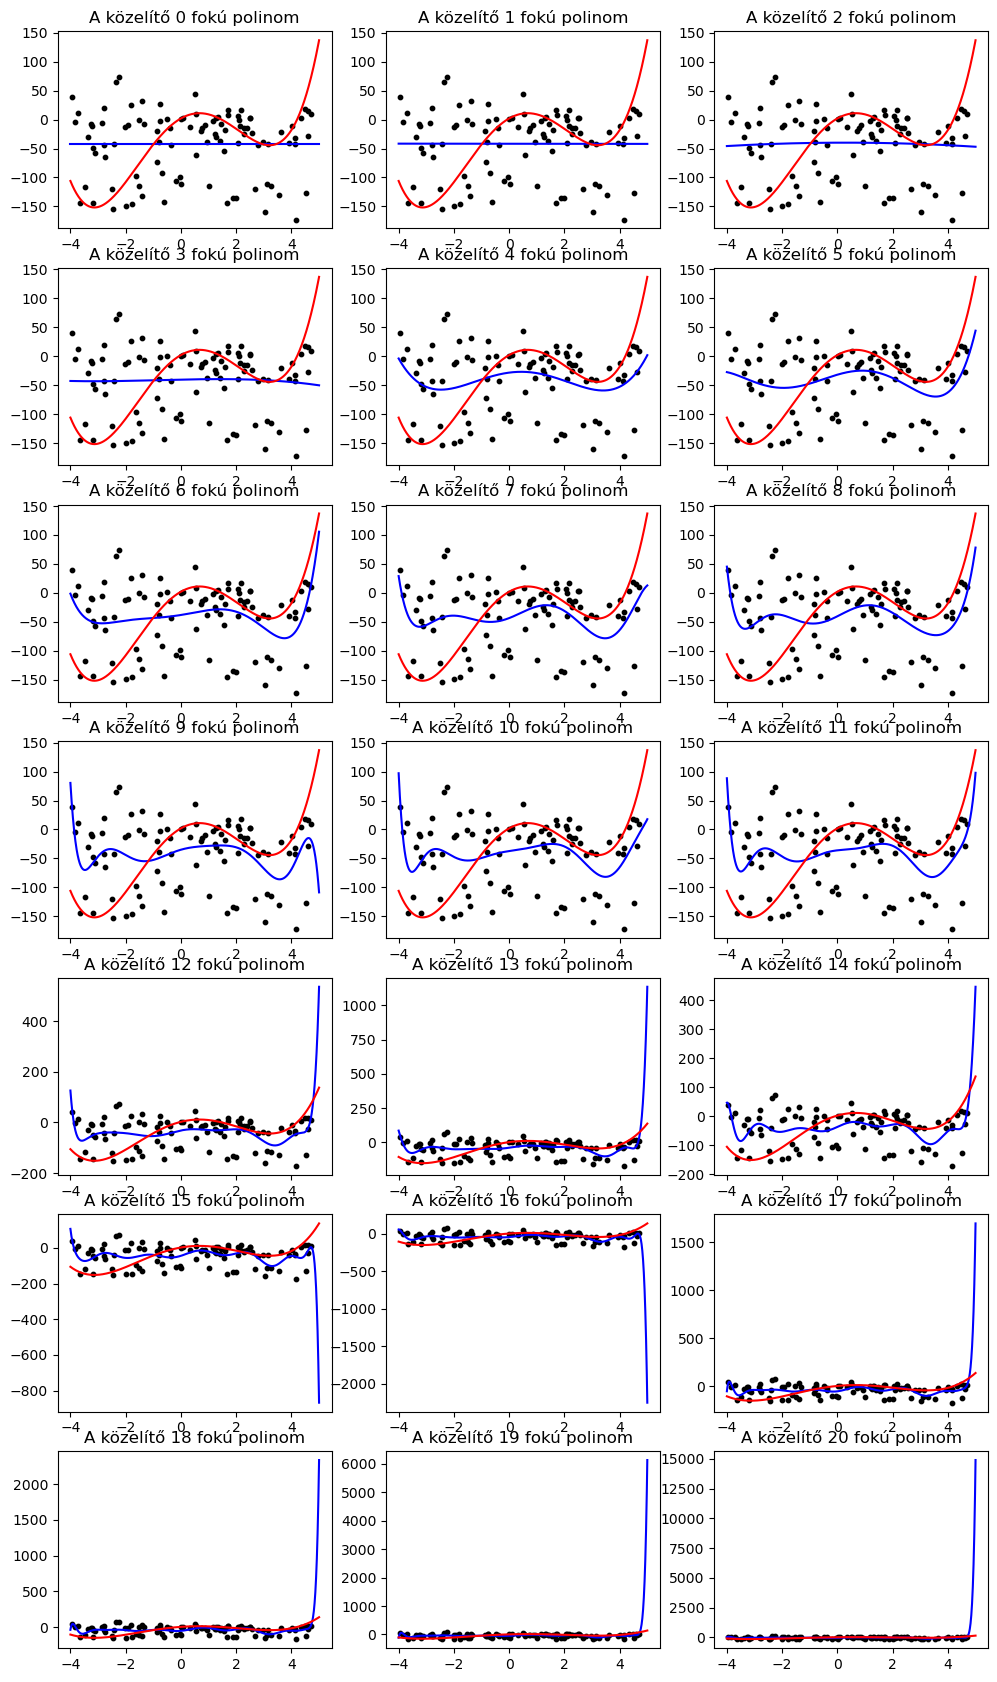

In [6]:
x = np.linspace(-4, 5, 1000)

fig, axs = plt.subplots(7, 3, figsize=(12,21))

for j in range(7):
    for i in range(3):
        ### itt i<->j csere ???
        f=np.poly1d(np.polyfit(list, list_y, i+3*j))
        y=f(x)
        axs[j, i].plot(x, y, c="blue")
        axs[j,i].scatter(list, list_y, c="black", s=10)
        axs[j,i].set_title(f'A közelítő {i+3*j} fokú polinom')
        axs[j,i].plot(x, x ** 4  -  x ** 3 - 20 * x ** 2 + 27 * x + 2, c="red")

plt.show()


Válasz: Főleg a polinom kirajzolásakor, de a négyzetes hibafüggvény ábráján is egyértelműen látszódik hogy nagy fokú polinommal ha becslünk, túltanul az algoritmusunk

**c)** (2 pont)<br>
Hogy változik a modell teljesítménye, ha változtatjuk a tanítóhalmaz méretét? 
* A regressziós polinom fokának rögzítése mellett változtasd a tanítóhalmaz méretét az eredeti tanítóhalmaz méretének megszorításával.
* A tanítóhalmaz méretének függvényében ábrázold egy ábrán a tanítóhalmazbeli és a teszthalmazbeli hibát (RMSE-értéket).
* Jelöld az ábrán a célváltozó generálásának véletlenségéből adódó belső (irreducibilis) hibát is, ez itt a *sigma* szórás értékének felel meg, vagyis konstans.
* Végezd el ezt az elemzést úgy, hogy a polinom fokát 1-re, 3-ra, 4-re, 8-ra, majd 20-ra állítod.  
* Mit tapasztalsz? Értelmezd az ábrákat!

---

## 3. feladat (HF4/3) (9 pont)

Még mindig borban az igazság! 🍷 <br> Ebben a feladatban (a HF2/3 feladathoz hasonlóan) különböző borok minőségét kell prediktálnunk. Haladó osztályozási algoritmusok segítségével vizsgáljuk, hogy meg tudjuk-e jósolni pusztán a bor kémiai tulajdonságai alapján, hogy minőségi bornak fogja-e tartani a szakma.

**a)** (1 pont)<br>
Ismételd meg a HF2/3/a feladatot: A [UCI adattárházban](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) található adatok alapján fogunk vizsgálódni. Ez több ezer észak-portugáliai bor 11 kémiai tulajdonságát (pl. cukortartalom, pH, alkoholtartalom, stb.) és egy a borokra vonatkozó 10-es skálán mért minőségi mutatót tartalmaz.

* Töltsd be a **vörös**borok adatait egy pandas dataframe-be [az adattárházból](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (Az adatot közvetlenül az internetről, a fájl saját gépre való letöltése nélkül töltsd be!)
* A *quality* oszlop lesz a célváltozó, a többi pedig a magyarázóváltozó (feature). Bináris osztályozási feladatként tekintünk a továbbiakban a problémára, ezért a célváltozó értékét definiáld át: legyen az értéke 0, ha *quality $<$ 7* (rossz borok), és legyen az értéke 1, ha *quality $\geq$ 7* (jó borok).
* Hozz létre külön numpy array-ket a célváltozó és az attribútumok tárolására!

In [7]:
wines = pd.read_csv('../Adatok/winequality-red.csv', sep=';' )

In [8]:
def csere(x):
    if x<6.5:
        return 0
    else:
        return 1

wines["quality"] = wines["quality"].apply(csere)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
X = np.array(wines[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])
y = np.array(wines["quality"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

**b)** (4 pont)<br>
Véletlen erdő
* Használj véletlen erdő algoritmust (20 fával) az osztályozásra! 
* Kérd le az egyes rekordokhoz tartozó valószínűségi pontértékeket! A bináris döntést ez alapján a pontérték alapján fogjuk meghozni, alapesetben 0.5 fölött tekintjük 1-es osztályba tartozónak, most viszont változtatni fogjuk a küszöbértéket.<br>
> Tipp: használd a *predict_proba* függvényt! 

* Írj egy *predict_with_threshold* nevű függvényt, aminek bemenő paraméterei a betanított osztályozó, az adatmátrix, amire a jóslást elvégezzük és a küszöbindex (a küszöbindex az a pontérték, ami felett 1-est döntünk), eredménye pedig a rekordokra vonatkozó bináris döntés.

* Tízszeres keresztvalidációval állapítsd meg, hogy milyen küszöbérték esetén lesz optimális az osztályozás F-mértéke! (Vizsgáld a küszöbértéket a 0.1, 0.2, $\dots$ 0.9 halmazon!)<br>
> Tipp: használd a *model_selection.cross_val_score* függvényt *scoring=modified_f1(threshold)* beállítással, ahol a *threshold* végigmegy a küszöbérték lehetséges értékein!

* Ábrázold a *threshold* függvényében a keresztvalidációs technikával kijövő F-mértékek boxplotját! Értelmezd a kapott ábrát, milyen érték esetén kapjuk a legjobb predikciót? Magyarázd el, hogy miért kaphattuk ezt az eredményt annak tükrében, hogy kiegyensúlyozatlan osztályeloszlású osztályozási feladaot oldottunk meg.<br>
> Tipp: használd a *seaborn* csomag boxplot függvényét!

Segítségképpen megadok egy *modified_f1* függvényt, aminek bemenete egy küszöbérték, eredménye pedig egy olyan függvény, ami megfelelő arra, hogy a *cross_val_score* *scoring* argumentuma legyen. Ez a függvény használja az általad megfelelően definiált *predict_with_threshold* nevű függvényt!

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)

In [11]:
def predict_with_threshold(model, matrix, treshold):
    return [1 if model.predict_proba(matrix)[i][0] >= treshold else 0 for i in range(len(matrix))]

In [12]:
def modified_f1( threshold ):
    
    def f1_threshold( clf , X , y ):
        y_pred = predict_with_threshold( clf , X , threshold )
        return sklearn.metrics.f1_score( y , y_pred )
        
    return f1_threshold

In [ ]:
for threshold in range(1,10):
    scores = cross_val_score(model, X, y, cv=10, scoring=modified_f1(threshold))


És innentől nincs elkészítve...

**c)** (1 pont)<br>
A véletlen erdő segítségével az attribútumokhoz rendelhetünk egy fontossági értéket. 
* Ábrázold a véletlen erdő által adott, az egyes attribútumokhoz tartozó relatív fontossági értékeket oszlopdiagramon.<br>
> Tipp: használd a *feature\_importances\_* opciót!

* Mi a két legfontosabb változó?

**d)** (3 pont)<br>
Az osztályozók által adott döntési határt érdekes ábrázolni, hogy jobban megértsük az osztályozó döntését, ugyanakkor ezt természetesen csak kis dimenzió esetén tudjuk vizuálisan értelmezni. Éppen ezért a következőkben szorítsd meg az attribútumteret az előző feladatrész alapján legfontosabbnak adódó két attribútumra! 
* Az alábbi osztályozók döntési határát ezután ábrázold a lent megadott ábrázoló függvény segítségével: 
    * döntési fa az alapértelmezett beállításokkal
    * véletlen erdő (15 döntési fával)
    * SVM (C = 100, gamma = 1.0 beállításokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight=None beállításokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight='balanced' beállításokkal) (A 'balanced' beállítás az osztály gyakoriságával fordítottan arányos módon rendel súlyt az egyes osztályba tartozó rekordokhoz.)
> Tipp: a szupport vektor géphez használd az *sklearn.svm.SVC* függvényt!

* Az *svm.SVC* milyen kernelt használ alapértelmezetten? Nézz utána és írd le, hogy ilyen esetben mi a C és a gamma szerepe?
* Értelmezd az ábrákat! Melyik esetben lehet túltanulásról beszélni, miért? Melyik döntési határ a legkomplexebb?
* Mi a szerepe a döntési határt illetően a class_weight két kipróbált beállításának? Melyik esetben lehet jobb a recall, a precision és az accurary érték? Hogy lehetne javítani az SVM teljesítményét?

A következőkben megadott döntési határt kirajzoló függvényt bátran módosítsd, javítsd, hogy jobban átlátható ábrákat kapj!

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap( [ '#FFAAAA' , '#AAFFAA' , '#AAAAFF' ] )
cmap_bold = ListedColormap( [ '#FF0000' , '#00FF00' , '#0000FF' ] )

def points_plot( X , y , clf , colorscale = cmap_light , cdiscrete=cmap_bold ):
    
    if X.shape[ 1 ] != 2:
        raise ValueError( "X should have two features!" )
    
    Xtr , Xte , ytr , yte = train_test_split( X , y , train_size = 0.6 )
    clf = clf.fit( Xtr , ytr )
    h = 0.01
    x_min , x_max = X[ : , 0 ].min() - 0.5 , X[ : , 0 ].max() + 0.5
    y_min , y_max = X[ : , 1 ].min() - 0.5 , X[ : , 1 ].max() + 0.5
    xx , yy = np.meshgrid( np.linspace( x_min , x_max , 50 ) , np.linspace( y_min , y_max , 50 ) )
    
    plt.figure()
    Z = clf.predict( np.c_[ xx.ravel() , yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    plt.pcolormesh( xx , yy , Z , cmap = cmap_light , alpha = 0.2 )
    # train points
    plt.scatter( Xtr[ : , 0 ] , Xtr[ : , 1 ] , c = ytr - 1 , cmap = cdiscrete , s = 50 , alpha = 0.2 , edgecolor = "k" )
    # test points
    plt.scatter( Xte[ : , 0 ] , Xte[ : , 1 ] , c = yte - 1 , cmap = cdiscrete , alpha = 0.5 , marker = "s" , s = 35 )
    plt.xlim( xx.min() , xx.max() )
    plt.ylim( yy.min() , yy.max() )
    # titles, labels
    plt.title( str( clf )[ 0 : str( clf ).find( "(" ) ] )
    plt.xlabel( "Feature 1" )
    plt.ylabel( "Feature 2" )

---